# RAG Demo

RAG (Retrieval-Augmented Generation) combines information retrieval and language generation in machine learning. It retrieves relevant data before generating responses, enhancing the model's output quality and knowledge.

RAG (Retrieval-Augmented Generation) is a type of language model architecture that combines the capabilities of both generation and retrieval models. The goal of RAG is to improve the quality and relevance of generated text by incorporating information from a reference corpus, such as a knowledge base or a database of relevant texts.

In a traditional language model, the generator network takes a random noise vector as input and generates text based on a learned probability distribution. In contrast, RAG adds an additional retrieval network that is trained to retrieve relevant passages from the reference corpus and use them to augment the generator's output. This allows the generator to learn from the reference corpus and generate more informative and accurate text.

RAG consists of two main components: a question encoder and a retriever. The question encoder takes in a question or prompt and outputs a vector representation that captures the meaning of the question. The retriever then uses this vector to retrieve relevant passages from the reference corpus, which are then used to augment the generator's output.

# 0. Imports and model setup

install [requirements](requirements.txt) and [README](README.md) 

In [1]:
import gradio as gr  # for creating web UIs for Python applications
from langchain_community.document_loaders import WebBaseLoader  # document loaders for web and PDF sources
from langchain_community.vectorstores import Chroma  #v ector store for document embeddings
from langchain_community import embeddings  # for generating embeddings
from langchain_community.chat_models import ChatOllama  # model for generating responses
from langchain_core.runnables import RunnablePassthrough  # for passing arguments as-is in pipelines
from langchain_core.output_parsers import StrOutputParser  # for parsing outputs to strings
from langchain_core.prompts import ChatPromptTemplate  # for creating chat prompts
from langchain.output_parsers import PydanticOutputParser  # for parsing outputs using Pydantic models
from langchain.text_splitter import CharacterTextSplitter  # for splitting text based on character count


[LangChain](https://python.langchain.com/docs/get_started/introduction) is a framework for developing applications powered by language models. It enables applications that:
* Are context-aware: connect a language model to sources of context (prompt instructions, few shot examples, content to ground its response in, etc.)
* Reason: rely on a language model to reason (about how to answer based on provided context, what actions to take, etc.)  

This framework consists of several parts.  

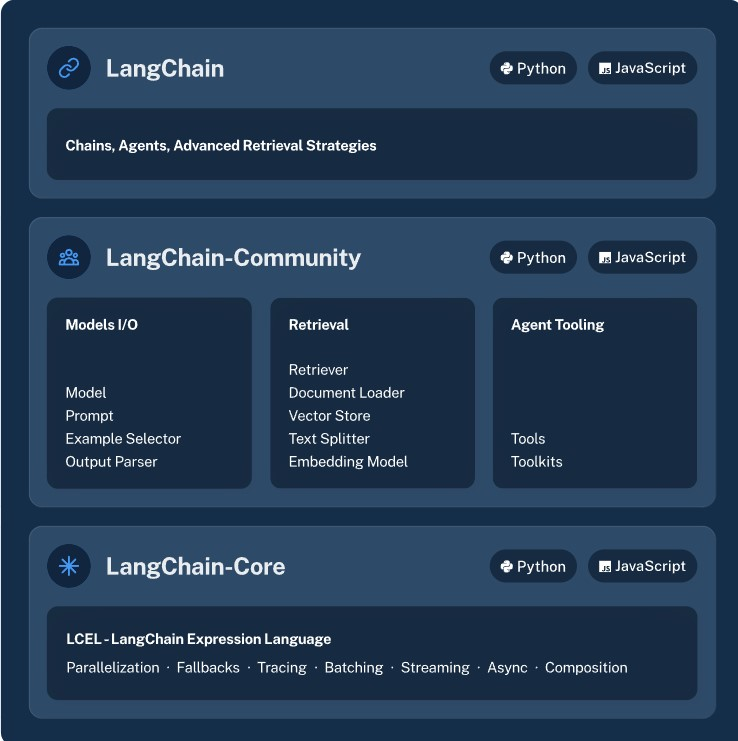

In [2]:
llm = ChatOllama(model="llama2", temperature=0.6)


```python
*,
    name: str | None = None,
    base_url: str = "http://localhost:11434",
    model: str = "llama2",
    mirostat: int | None = None,
    mirostat_eta: float | None = None,
    mirostat_tau: float | None = None,
    num_ctx: int | None = None,
    num_gpu: int | None = None,
    num_thread: int | None = None,
    repeat_last_n: int | None = None,
    repeat_penalty: float | None = None,
    temperature: float | None = None,
    stop: List[str] | None = None,
    tfs_z: float | None = None,
    top_k: int | None = None,
    top_p: int | None = None,
    system: str | None = None,
    template: str | None = None,
    format: str | None = None,
    timeout: int | None = None,
    cache: bool | None = None,
    verbose: bool = _get_verbosity,
    callbacks: Callbacks = None,
    callback_manager: BaseCallbackManager | None = None,
    tags: List[str] | None = None,
    metadata: Dict[str, Any] | None = None
```

# 1. Split data into chunks

In [3]:
urls = [
    "https://github.com/gkamradt/LLMTest_NeedleInAHaystack",
    "https://towardsdatascience.com/the-needle-in-a-haystack-test-a94974c1ad38",
    "https://opencompass.readthedocs.io/en/latest/advanced_guides/needleinahaystack_eval.html",
    'https://arize.com/blog-course/the-needle-in-a-haystack-test-evaluating-the-performance-of-llm-rag-systems/',
]


In [4]:
docs = [WebBaseLoader(url).load() for url in urls]
docs


[[Document(page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub - gkamradt/LLMTest_NeedleInAHaystack: Doing simple retrieval from LLM models at various context lengths to measure accuracy\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\nToggle navigation\n\n\n\n\n\n\n\n\n\n\n          Sign in\n        \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\nActions\n        Automate any workflow\n      \n\n\n\n\n\n\n\nPackages\n        Host and manage packages\n      \n\n\n\n\n\n\n\nSecurity\n        Find and fix vulnerabilities\n      \n\n\n\n\n\n\n\nCodespaces\n        Instant dev environments\n      \n\n\n\n\n\n\n\nCopilot\n        Write better code with AI\n      \n\n\n\n\n\n\n\nCode review\n        Manage code changes\n      \n\n\n\n\n\n\n\nIssues\n        Plan and tra

In [5]:
docs_list = [item for sublist in docs for item in sublist]
docs_list


[Document(page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGitHub - gkamradt/LLMTest_NeedleInAHaystack: Doing simple retrieval from LLM models at various context lengths to measure accuracy\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\nToggle navigation\n\n\n\n\n\n\n\n\n\n\n          Sign in\n        \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\nActions\n        Automate any workflow\n      \n\n\n\n\n\n\n\nPackages\n        Host and manage packages\n      \n\n\n\n\n\n\n\nSecurity\n        Find and fix vulnerabilities\n      \n\n\n\n\n\n\n\nCodespaces\n        Instant dev environments\n      \n\n\n\n\n\n\n\nCopilot\n        Write better code with AI\n      \n\n\n\n\n\n\n\nCode review\n        Manage code changes\n      \n\n\n\n\n\n\n\nIssues\n        Plan and trac

Text splitter that uses tiktoken encoder to count length.

In [6]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(chunk_size=7500, chunk_overlap=100)


tiktoken is a fast BPE tokenizer created by OpenAI.

Byte-Pair Encoding: Subword-based tokenization algorithm

In [7]:
doc_splits = text_splitter.split_documents(docs_list)
doc_splits


[Document(page_content="GitHub - gkamradt/LLMTest_NeedleInAHaystack: Doing simple retrieval from LLM models at various context lengths to measure accuracy\n\nSkip to content\n\nToggle navigation\n\n\n          Sign in\n        \n\n\n \n\n        Product\n        \n\n\nActions\n        Automate any workflow\n      \n\nPackages\n        Host and manage packages\n      \n\nSecurity\n        Find and fix vulnerabilities\n      \n\nCodespaces\n        Instant dev environments\n      \n\nCopilot\n        Write better code with AI\n      \n\nCode review\n        Manage code changes\n      \n\nIssues\n        Plan and track work\n      \n\nDiscussions\n        Collaborate outside of code\n      \n\n\nExplore\n\n      All features\n\n    \n\n      Documentation\n\n    \n\n      GitHub Skills\n\n    \n\n      Blog\n\n    \n\n        Solutions\n        \n\nFor\n\n      Enterprise\n\n    \n\n      Teams\n\n    \n\n      Startups\n\n    \n\n      Education\n\n    \n\n\nBy Solution\n\n      CI/CD & 

# 2. Convert documents to Embeddings and store them


A Reproducible Long Context (8192) Text Embedde with [ Nomic Embed: A Truly Open Embedding Model](https://blog.nomic.ai/posts/nomic-embed-text-v1)  [🤗](https://huggingface.co/nomic-ai/nomic-embed-text-v1)

In [8]:
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-demo-chroma",
    embedding=embeddings.ollama.OllamaEmbeddings(model='nomic-embed-text'),
)


chromadb is not presistent by default

In [9]:
vectorstore.get()


{'ids': ['0512a70a-d7cc-11ee-b345-8c8d28ad5f1a',
  '0512a70b-d7cc-11ee-bc07-8c8d28ad5f1a',
  '0512a70c-d7cc-11ee-b9c0-8c8d28ad5f1a',
  '0512a70d-d7cc-11ee-87f0-8c8d28ad5f1a'],
 'embeddings': None,
 'metadatas': [{'description': 'Doing simple retrieval from LLM models at various context lengths to measure accuracy - gkamradt/LLMTest_NeedleInAHaystack',
   'language': 'en',
   'source': 'https://github.com/gkamradt/LLMTest_NeedleInAHaystack',
   'title': 'GitHub - gkamradt/LLMTest_NeedleInAHaystack: Doing simple retrieval from LLM models at various context lengths to measure accuracy'},
  {'description': 'Retrieval-augmented generation (RAG) underpins many of the LLM applications in the real world today, from companies generating headlines to solo developers solving problems for small businesses. RAG…',
   'language': 'en',
   'source': 'https://towardsdatascience.com/the-needle-in-a-haystack-test-a94974c1ad38',
   'title': 'The Needle In a Haystack Test. Evaluating the performance of RA

In [10]:
retriever = vectorstore.as_retriever()
retriever


VectorStoreRetriever(tags=['Chroma', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x0000028553D7FF10>)

# 3. Before RAG

In [11]:
before_rag_template = "What is {topic}"
before_rag_prompt = ChatPromptTemplate.from_template(before_rag_template)
before_rag_chain = before_rag_prompt | llm | StrOutputParser()
print(before_rag_chain.invoke({"topic": "needle in haystack"}))



"Needle in a haystack" is an idiom that means something that is very difficult to find or locate, often because it is hidden among a lot of other things. The phrase is often used to describe a situation where someone is searching for something specific, but it is hard to find due to the large amount of irrelevant or distracting information present.

The phrase is thought to have originated from the idea of trying to find a small needle buried in a large pile of hay. It is a metaphor for a difficult task, as finding a single needle in a huge amount of hay would be almost impossible without some sort of guidance or hint.

Examples:

* "I've been searching for my car keys all morning, but they're like a needle in a haystack."
* "Finding the perfect job is like looking for a needle in a haystack – it's out there, but you have to sift through a lot of other options first."
* "The needle in the haystack was the last thing I expected to find in this box of random items."

In summary, "needle

'|' operator: Instead of its traditional use for bitwise operations, here it's used to pass data from one object to the next in the pipeline. The | operator has been overloaded by the classes of the objects involved 

# 4. After RAG

In [12]:

after_rag_template = """Answer the question based only on the following context:
{context}
Question: {question}
"""
after_rag_prompt = ChatPromptTemplate.from_template(after_rag_template)
after_rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | after_rag_prompt
    | llm
    | StrOutputParser()
)
print(after_rag_chain.invoke("whats needle in haystack?"))



The "Needle in a Haystack" test is a method to assess an AI model's ability to extract relevant information from a large amount of text or data, much like finding a specific needle in a haystack. In this context, the "haystack" represents the vast amount of text or data, and the "needle" represents the specific piece of information that the model needs to retrieve.

The test involves providing the AI model with a large amount of context, such as a document or a group of documents, and then asking it to find a specific piece of information within that context. The model's ability to locate the needle in the haystack is measured by its precision and recall in retrieving the correct information.

The test is useful for evaluating the performance of large language models (LLMs) and other natural language processing (NLP) models, as it can help identify their strengths and weaknesses in parsing context to find needed information.


# 5. gradio (UI)

[gradio](https://www.gradio.app/) fastest (& simplest) way to demo ur ML model with friendly web UI

In [13]:
import gradio as gr

gr.Interface(fn=lambda x, y: x + y, 
             inputs=["number", "number"], 
             outputs="number").launch()


Running on local URL:  http://127.0.0.1:7861

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

To create a public link, set `share=True` in `launch()`.


# 6. App

In [14]:

def process_input(urls, question):
    llm = ChatOllama(model="llama2", temperature=0.8)  # Initialize ChatOllama model
    
    # Convert string of URLs to list by splitting on new lines
    urls_list = urls.split("\n")

    # Load documents from URLs using WebBaseLoader and compile them into a list
    docs = [WebBaseLoader(url).load() for url in urls_list]

    # Flatten the list of lists into a single list
    docs_list = [item for sublist in docs for item in sublist]
    
    # Initialize a text splitter with specified chunk size and overlap
    text_splitter = CharacterTextSplitter.from_tiktoken_encoder(chunk_size=8000, chunk_overlap=100)
    # Split the loaded documents into chunks
    doc_splits = text_splitter.split_documents(docs_list)

    # Create a Chroma vector store from the document splits, using Ollama embeddings
    vectorstore = Chroma.from_documents(
        documents=doc_splits,
        collection_name="rag-ollama",
        embedding=embeddings.ollama.OllamaEmbeddings(model='nomic-embed-text'),
    )
    # Convert the Chroma vector store into a retriever
    retriever = vectorstore.as_retriever()

    # Template for generating responses, emphasizing brevity
    rag_template = """Laconicy answer the question based only on the following context:
    {context}.
    Question: {question}
    """

    # Create a chat prompt template from the template string
    rag_prompt = ChatPromptTemplate.from_template(rag_template)

    # Chain the components to create a processing pipeline
    after_rag_chain = (
        {"context": retriever, "question": RunnablePassthrough()}  # Pass context and question to the pipeline
        | rag_prompt  # Apply the chat prompt template
        | llm  # Pass the result to the LLM for processing
        | StrOutputParser()  # Parse the model's output to a string
    )
    # Invoke the processing chain with the input question and return the result
    return after_rag_chain.invoke(question)

# Define a Gradio interface with specified inputs and output
iface = gr.Interface(fn=process_input,
                     inputs=[gr.Textbox(label="Enter URLs separated by new lines"), 
                             gr.Textbox(label="Question")],
                     outputs="text",
                     title="Document Query with Ollama",
                     description="Enter URLs and a question to query the documents.")
iface.launch()  # Launch the Gradio interface


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


"Flag" button writes input and ansewer into flagged/log.csv

# 7. Slides

In [15]:
!jupyter nbconvert demo.ipynb  --to slides


[NbConvertApp] Converting notebook demo.ipynb to slides
[NbConvertApp] Writing 956174 bytes to demo.slides.html
